# Table of Contents
- [Import Packages](#01)
- [Data making, visualize, tensor](#02)
- [Code with](#03)
    - [1- custom z, gradient update, accuracy](#03-1)
    - [2- custom z, gradient update](#03-2)
    - [3- optimizer, custom z](#03-3)
    - [4- linear layer, custom gradient update](#03-4)
    - [5- linear layer, optimizer](#03-5)
    - [6- sequential layer, custom gradient update](#03-6)
    - [7- sequential layer, optimizer](#03-7)
    - [8- class z,  custom gradient update](#03-8)
    - [9- class z,  optimizer](#03-9)
    - [10- class forward,  custom gradient update](#03-10)
    - [11- class forward,  optimizer](#03-11)
- [Result plot](#04)
- [Note1 - delete ipynb variables except](#note1)
- [Note2 - accessing parameters ways](#note2)

# Import Packages<a id="01"></a>

In [1]:
import torch
import helper_functions as h
from torcheval.metrics.functional import binary_accuracy

# Data making, visualize, tensor<a id="02"></a>

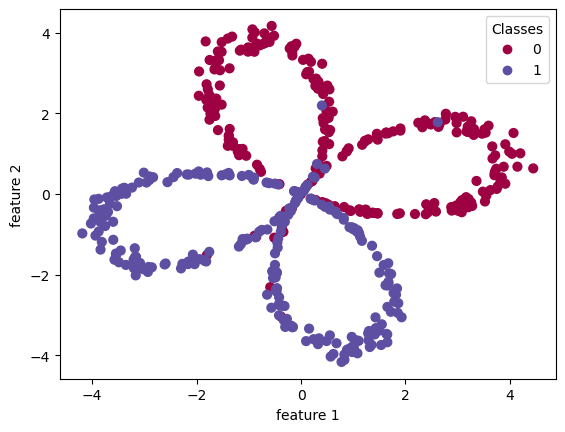

In [2]:
X_np, Y_np = h.load_flower_dataset(num_samples=500, petals=2, angle=30)
h.plot_scatter(X_np, Y_np)

In [3]:
X = torch.tensor(X_np, dtype=torch.float32)   # shape=(2,500)=(d,m)
Y = torch.tensor(Y_np, dtype=torch.float32)   # shape=(1,500)=(1,m)

# Note1 - delete ipynb variables except<a id="note1"></a>

In [4]:
# %reset_selective -f ^(?!X$|Y$|torch$|binary_accuracy$|h$|X_np$|Y_np$).*
# ## following not delete X_np, Y_np, torchjj etc
# # %reset_selective -f ^((?!X|Y|torch|binary_accuracy|h).)*$

# Code with<a id="03"></a>

# 1- custom z, gradient update, accuracy<a id="03-1"></a>

In [5]:
%reset_selective -f ^(?!X$|Y$|torch$|binary_accuracy$|h$|X_np$|Y_np$).*

## Hyperparameters
num_epochs = 100
learning_rate = 0.005

costs = []                                        # To keep track of the cost
train_acc = []
print_cost=True

## Initialize parameters with zeros
w = torch.zeros(X.shape[0], 1, requires_grad=True)     # shape=(d,1)=(500,1)
b = torch.zeros((), requires_grad=True)                # shape=()

## epochs loop
for i in range (num_epochs):
    ## forward pass
    z = torch.mm(w.T,X)+b    # shape(1,m) --> (1,d)X(d,m) float32
    Y_pred = torch.sigmoid(z)
    # cost = torch.nn.functional.binary_cross_entropy_with_logits(z, Y, reduction="mean")
    cost = torch.nn.functional.binary_cross_entropy(Y_pred, Y, reduction="mean")

    ## backward passs
    cost.backward()
    
    ## debugging
    # print(w, b)
    # print(f"Cost in epochs {i+1}, {cost.item()}")
    # print("-------------------------------------------------")

    ## updata parameters
    w.data = w.data - learning_rate * w.grad.data
    b.data = b.data - learning_rate * b.grad.data
    
    ## zero the gradients before running the backward pass
    w.grad.data.zero_()
    b.grad.data.zero_()

    ## Record the costs
    if i % 10 == 0 or i==num_epochs-1:
        costs.append(cost.item())
        ## Binary Accuracy
        Y_pred_out = (Y_pred > 0.5).type(torch.float32) # shape(1,m) float32
        acc = torch.mean( (Y_pred_out == Y).type(torch.float32) )
        train_acc.append(acc.item()*100)
        ## Print the cost every 10 training epochs
        if print_cost:
            print(f"Cost in epochs {i+1}, {cost.item()}")

## Predict train/test set examples
z = torch.mm(w.T, X)+b    # shape(1,m) --> (1,d)X(d,m) float32
Y_pred = torch.sigmoid(z)                 # shape(1,m) float32
Y_pred_out = (Y_pred > 0.5).type(torch.float32) # shape(1,m) float32

## Print train/test Errors
if print_cost:
    acc = torch.mean( (Y_pred_out == Y).type(torch.float32) )
    print(f"train accuracy: {acc.item()*100} %")

Cost in epochs 1, 0.6931473016738892
Cost in epochs 11, 0.6628669500350952
Cost in epochs 21, 0.6354119777679443
Cost in epochs 31, 0.6105014681816101
Cost in epochs 41, 0.5878750085830688
Cost in epochs 51, 0.5672946572303772
Cost in epochs 61, 0.5485450625419617
Cost in epochs 71, 0.5314322113990784
Cost in epochs 81, 0.5157829523086548
Cost in epochs 91, 0.501443088054657
Cost in epochs 100, 0.48954322934150696
train accuracy: 94.80000138282776 %


# 2- custom z, gradient update<a id="03-2"></a>

In [6]:
%reset_selective -f ^(?!X$|Y$|torch$|binary_accuracy$|h$|X_np$|Y_np$).*

## Hyperparameters
num_epochs = 100
learning_rate = 0.005

costs = []                                        # To keep track of the cost
train_acc = []
print_cost=True

## initialize parameters with zeros
w = torch.zeros(X.shape[0], 1, requires_grad=True)     # shape=(d,1)=(500,1)
b = torch.zeros((), requires_grad=True)    # shape=()

## epochs loop
for i in range (num_epochs):
    ## forward pass
    z = torch.mm(w.T,X)+b
    Y_pred = torch.sigmoid(z)
    # cost = torch.nn.functional.binary_cross_entropy_with_logits(z, Y, reduction="mean")
    cost = torch.nn.functional.binary_cross_entropy(Y_pred, Y, reduction="mean")

    ## backward passs
    cost.backward()
    
    ## debugging
    # print(w, b)
    # print(f"Cost in epochs {i+1}, {cost.item()}")
    # print("-------------------------------------------------")


    ## updata parameters
    w.data = w.data - learning_rate * w.grad.data
    b.data = b.data - learning_rate * b.grad.data
    
    ## zero the gradients before running the backward pass
    w.grad.data.zero_()
    b.grad.data.zero_()

    ## Record the costs
    if i % 10 == 0 or i==num_epochs-1:
        costs.append(cost.item())
        ## Binary Accuracy
        acc = binary_accuracy(input=Y_pred.view(-1,), target=Y.view(-1,), threshold=0.5)
        train_acc.append(acc.item()*100)
        ## Print the cost every 10 training epochs
        if print_cost:
            print(f"Cost in epochs {i+1}, {cost.item()}")

## Predict train/test set examples
z = torch.mm(w.T,X)+b    # shape(1,m) --> (1,d)X(d,m) float32
Y_pred = torch.sigmoid(z)                 # shape(1,m) float32
Y_pred_out = (Y_pred > 0.5).type(torch.float32) # shape(1,m) float32

## Print train/test Errors
if print_cost:
    acc = binary_accuracy(input=Y_pred.view(-1,), target=Y.view(-1), threshold=0.5)
    print(f"train accuracy: {acc.item()*100} %")

Cost in epochs 1, 0.6931473016738892
Cost in epochs 11, 0.6628669500350952
Cost in epochs 21, 0.6354119777679443
Cost in epochs 31, 0.6105014681816101
Cost in epochs 41, 0.5878750085830688
Cost in epochs 51, 0.5672946572303772
Cost in epochs 61, 0.5485450625419617
Cost in epochs 71, 0.5314322113990784
Cost in epochs 81, 0.5157829523086548
Cost in epochs 91, 0.501443088054657
Cost in epochs 100, 0.48954322934150696
train accuracy: 94.80000138282776 %


# 3- optimizer, custom z<a id="03-3"></a>

In [7]:
%reset_selective -f ^(?!X$|Y$|torch$|binary_accuracy$|h$|X_np$|Y_np$).*

## Hyperparameters
num_epochs = 100
learning_rate = 0.005

costs = []                                        # To keep track of the cost
train_acc = []
print_cost=True

## initialize parameters with zeros
w = torch.zeros(X.shape[0], 1, requires_grad=True)     # shape=(d,1)=(500,1)
b = torch.zeros((), requires_grad=True)    # shape=()
optimizer = torch.optim.SGD([w,b], lr = learning_rate)

## epochs loop
for i in range (num_epochs):
    ## forward pass
    z = torch.mm(w.T,X)+b
    Y_pred = torch.sigmoid(z)
    # cost = torch.nn.functional.binary_cross_entropy_with_logits(z, Y, reduction="mean")
    cost = torch.nn.functional.binary_cross_entropy(Y_pred, Y, reduction="mean")

    ## backward passs
    optimizer.zero_grad()
    cost.backward()
    optimizer.step()
    
    ## debugging
    # print(w, b)
    # print(f"Cost in epochs {i+1}, {cost.item()}")
    # print("-------------------------------------------------")

    ## Record the costs
    if i % 10 == 0 or i==num_epochs-1:
        costs.append(cost.item())
        ## Binary Accuracy
        acc = binary_accuracy(input=Y_pred.view(-1,), target=Y.view(-1,), threshold=0.5)
        train_acc.append(acc.item()*100)
        ## Print the cost every 10 training epochs
        if print_cost:
            print(f"Cost in epochs {i+1}, {cost.item()}")

## Predict train/test set examples
z = torch.mm(w.T,X)+b    # shape(1,m) --> (1,d)X(d,m) float32
Y_pred = torch.sigmoid(z)                 # shape(1,m) float32
Y_pred_out = (Y_pred > 0.5).type(torch.float32) # shape(1,m) float32

## Print train/test Errors
if print_cost:
    acc = binary_accuracy(input=Y_pred.view(-1,), target=Y.view(-1), threshold=0.5)
    print(f"train accuracy: {acc.item()*100} %")

Cost in epochs 1, 0.6931473016738892
Cost in epochs 11, 0.6628669500350952
Cost in epochs 21, 0.6354119777679443
Cost in epochs 31, 0.6105014681816101
Cost in epochs 41, 0.5878750085830688
Cost in epochs 51, 0.5672946572303772
Cost in epochs 61, 0.5485450625419617
Cost in epochs 71, 0.5314322113990784
Cost in epochs 81, 0.5157829523086548
Cost in epochs 91, 0.501443088054657
Cost in epochs 100, 0.48954322934150696
train accuracy: 94.80000138282776 %


# Note2 - accessing parameters ways<a id="note2"></a>

In [8]:
### Ways to access and initialize weights

z_node = torch.nn.Linear(in_features=X.shape[0], out_features=1, bias=True)
print(z_node.weight)
init_w = torch.zeros(1 ,X.shape[0])     # shape=(1,500)

# one way
with torch.no_grad():
    z_node.weight.copy_(init_w)
# z_node.weight.copy_(init_w)  #########error

# another way
with torch.no_grad():
    z_node.state_dict()["weight"].copy_(init_w)

# another way
z_node.weight.data = init_w

# another way
z_node.weight = torch.nn.Parameter(init_w)

# another way
z_node.state_dict()["weight"].data[0]=init_w

print(z_node.weight)

Parameter containing:
tensor([[-0.4848,  0.5103]], requires_grad=True)
Parameter containing:
tensor([[0., 0.]], requires_grad=True)


# 4- linear layer, custom gradient update<a id="03-4"></a>

In [9]:
%reset_selective -f ^(?!X$|Y$|torch$|binary_accuracy$|h$|X_np$|Y_np$).*

## Hyperparameters
num_epochs = 100
learning_rate = 0.005

costs = []                                        # To keep track of the cost
train_acc = []
print_cost=True

## Initialize parameters with zeros
init_w = torch.zeros(1 ,X.shape[0])     # shape=(1,500)=(1,d)
init_b = torch.zeros(())    # shape=()

## Initialize build-in classes
z_node = torch.nn.Linear(in_features=X.shape[0], out_features=1, bias=True)
with torch.no_grad():
    z_node.weight.copy_(init_w)
    z_node.bias.copy_(init_b)
sig = torch.nn.Sigmoid()
bce = torch.nn.BCELoss(reduction='mean')
# bce_logits = torch.nn.BCEWithLogitsLoss(reduction='mean')

## epochs loop
for i in range (num_epochs):
    ## forward pass
    z = z_node(X.T)       # column vector (500,1)=(m,1) --> X(m,d)*W(d,1)+b(m,)
    Y_pred = sig(z)
    cost = bce(input=Y_pred, target=Y.T)
    
    ## backward pass
    cost.backward()
    
    ## debugging
    # print(z_node.state_dict().values())
    # print(z_node.weight.grad, z_node.bias.grad)
    # print(f"Cost in epochs {i+1}, {cost.item()}")
    # print("-------------------------------------------------")

    ## updata parameters
    z_node.weight.data = z_node.weight - learning_rate * z_node.weight.grad
    z_node.bias.data = z_node.bias - learning_rate * z_node.bias.grad
    
    ## zero the gradients before running the backward pass
    z_node.weight.grad.data.zero_()
    z_node.bias.grad.data.zero_()
    
    ## Record the costs
    if i % 10 == 0 or i==num_epochs-1:
        costs.append(cost.item())
        ## Binary Accuracy
        acc = binary_accuracy(input=Y_pred.view(-1,), target=Y.view(-1,), threshold=0.5)
        train_acc.append(acc.item()*100)
        ## Print the cost every 10 training epochs
        if print_cost:
            print(f"Cost in epochs {i+1}, {cost.item()}")

## Predict train/test set examples
z = z_node(X.T)   # shape(m,1) --> X(m,d)*W(d,1)+b(m,); float32
Y_pred = sig(z)                 # shape(m,1) float32
Y_pred_out = (Y_pred > 0.5).type(torch.float32) # shape(m,1) float32

## Print train/test Errors
if print_cost:
    acc = binary_accuracy(input=Y_pred.view(-1,), target=Y.view(-1), threshold=0.5)
    print(f"train accuracy: {acc.item()*100} %")

Cost in epochs 1, 0.6931473016738892
Cost in epochs 11, 0.6628669500350952
Cost in epochs 21, 0.6354119777679443
Cost in epochs 31, 0.6105014681816101
Cost in epochs 41, 0.5878750085830688
Cost in epochs 51, 0.5672946572303772
Cost in epochs 61, 0.5485450625419617
Cost in epochs 71, 0.5314322113990784
Cost in epochs 81, 0.5157829523086548
Cost in epochs 91, 0.501443088054657
Cost in epochs 100, 0.48954322934150696
train accuracy: 94.80000138282776 %


# 5- linear layer, optimizer<a id="03-5"></a>

In [10]:
%reset_selective -f ^(?!X$|Y$|torch$|binary_accuracy$|h$|X_np$|Y_np$).*

## Hyperparameters
num_epochs = 100
learning_rate = 0.005

costs = []                                        # To keep track of the cost
train_acc = []
print_cost=True

## Initialize parameters with zeros
init_w = torch.zeros(1 ,X.shape[0])     # shape=(1,500)=(1,d)
init_b = torch.zeros(())    # shape=()

## Initialize build-in classes
z_node = torch.nn.Linear(in_features=X.shape[0], out_features=1, bias=True)    # column vector (500,1)=(m,1)
with torch.no_grad():
    z_node.weight.copy_(init_w)
    z_node.bias.copy_(init_b)
sig = torch.nn.Sigmoid()
optimizer = torch.optim.SGD(z_node.parameters(), lr = learning_rate)
bce = torch.nn.BCELoss(reduction='mean')
# bce_logits = torch.nn.BCEWithLogitsLoss(reduction='mean')

## epochs loop
for i in range (num_epochs):
    ## forward pass
    z = z_node(X.T)       # column vector (500,1)=(m,1) --> X(m,d)*W(d,1)+b(m,)
    Y_pred = sig(z)
    cost = bce(input=Y_pred, target=Y.T)

    ## debugging
    # print(z_node.state_dict().values())
    # print(z_node.weight.grad, z_node.bias.grad)
    # print(f"Cost in epochs {i+1}, {cost.item()}")
    # print("-------------------------------------------------")

    ## backward pass
    optimizer.zero_grad()
    cost.backward()
    optimizer.step()
    
    ## Record the costs
    if i % 10 == 0 or i==num_epochs-1:
        costs.append(cost.item())
        ## Binary Accuracy
        acc = binary_accuracy(input=Y_pred.view(-1,), target=Y.view(-1,), threshold=0.5)
        train_acc.append(acc.item()*100)
        ## Print the cost every 10 training epochs
        if print_cost:
            print(f"Cost in epochs {i+1}, {cost.item()}")

## Predict train/test set examples
z = z_node(X.T)   # shape(m,1) --> X(m,d)*W(d,1)+b(m,); float32
Y_pred = sig(z)                 # shape(m,1) float32
Y_pred_out = (Y_pred > 0.5).type(torch.float32) # shape(m,1) float32

## Print train/test Errors
if print_cost:
    acc = binary_accuracy(input=Y_pred.view(-1,), target=Y.view(-1), threshold=0.5)
    print(f"train accuracy: {acc.item()*100} %")

Cost in epochs 1, 0.6931473016738892
Cost in epochs 11, 0.6628669500350952
Cost in epochs 21, 0.6354119777679443
Cost in epochs 31, 0.6105014681816101
Cost in epochs 41, 0.5878750085830688
Cost in epochs 51, 0.5672946572303772
Cost in epochs 61, 0.5485450625419617
Cost in epochs 71, 0.5314322113990784
Cost in epochs 81, 0.5157829523086548
Cost in epochs 91, 0.501443088054657
Cost in epochs 100, 0.48954322934150696
train accuracy: 94.80000138282776 %


# 6- sequential layer, custom gradient update<a id="03-6"></a>

In [11]:
%reset_selective -f ^(?!X$|Y$|torch$|binary_accuracy$|h$|X_np$|Y_np$).*

## Hyperparameters
num_epochs = 100
learning_rate = 0.005

costs = []                                        # To keep track of the cost
train_acc = []
print_cost=True

## Initialize parameters with zeros
init_w = torch.zeros(1 ,X.shape[0])     # shape=(1,500)=(1,d)
init_b = torch.zeros(())    # shape=()

## Initialize build-in classes
forward = torch.nn.Sequential(torch.nn.Linear(X.shape[0], 1), torch.nn.Sigmoid()) # column vector (500,1)=(m,1)
with torch.no_grad():
    forward[0].weight.copy_(init_w)
    forward[0].bias.copy_(init_b)
bce = torch.nn.BCELoss(reduction='mean')

## epochs loop
for i in range (num_epochs):
    ## forward pass
    Y_pred = forward(X.T)       # column vector (500,1)=(m,1) --> X(m,d)*W(d,1)+b(m,)
    cost = bce(input=Y_pred, target=Y.T)
    
    ## backward pass
    cost.backward()
    
    ## debugging
    # print(forward[0].state_dict().values())
    # print(f"Cost in epochs {i+1}, {cost.item()}")
    # print("-------------------------------------------------")

    ## updata parameters
    forward[0].weight.data = forward[0].weight - learning_rate * forward[0].weight.grad
    forward[0].bias.data = forward[0].bias - learning_rate * forward[0].bias.grad
    
    ## zero the gradients before running the backward pass
    forward[0].weight.grad.data.zero_()
    forward[0].bias.grad.data.zero_()
    
    ## Record the costs
    if i % 10 == 0 or i==num_epochs-1:
        costs.append(cost.item())
        ## Binary Accuracy
        acc = binary_accuracy(input=Y_pred.view(-1,), target=Y.view(-1,), threshold=0.5)
        train_acc.append(acc.item()*100)
        ## Print the cost every 10 training epochs
        if print_cost:
            print(f"Cost in epochs {i+1}, {cost.item()}")

## Predict train/test set examples
Y_pred = forward(X.T)   # shape(m,1) --> X(m,d)*W(d,1)+b(m,); float32
Y_pred_out = (Y_pred > 0.5).type(torch.float32) # shape(m,1) float32

## Print train/test Errors
if print_cost:
    acc = binary_accuracy(input=Y_pred.view(-1,), target=Y.view(-1), threshold=0.5)
    print(f"train accuracy: {acc.item()*100} %")

Cost in epochs 1, 0.6931473016738892
Cost in epochs 11, 0.6628669500350952
Cost in epochs 21, 0.6354119777679443
Cost in epochs 31, 0.6105014681816101
Cost in epochs 41, 0.5878750085830688
Cost in epochs 51, 0.5672946572303772
Cost in epochs 61, 0.5485450625419617
Cost in epochs 71, 0.5314322113990784
Cost in epochs 81, 0.5157829523086548
Cost in epochs 91, 0.501443088054657
Cost in epochs 100, 0.48954322934150696
train accuracy: 94.80000138282776 %


# 7- sequential layer, optimizer<a id="03-7"></a>

In [24]:
%reset_selective -f ^(?!X$|Y$|torch$|binary_accuracy$|h$|X_np$|Y_np$).*

## Hyperparameters
num_epochs = 100
learning_rate = 0.005

costs = []                                        # To keep track of the cost
train_acc = []
print_cost=True

## Initialize parameters with zeros
init_w = torch.zeros(1 ,X.shape[0])     # shape=(1,500)=(1,d)
init_b = torch.zeros(())    # shape=()

## Initialize build-in classes
forward = torch.nn.Sequential(torch.nn.Linear(X.shape[0], 1), torch.nn.Sigmoid()) # column vector (500,1)=(m,1)
with torch.no_grad():
    forward[0].weight.copy_(init_w)
    forward[0].bias.copy_(init_b)
optimizer = torch.optim.SGD(forward.parameters(), lr = learning_rate)
bce = torch.nn.BCELoss(reduction='mean')

## epochs loop
for i in range (num_epochs):
    ## forward pass
    Y_pred = forward(X.T)       # column vector (500,1)=(m,1) --> X(m,d)*W(d,1)+b(m,)
    cost = bce(input=Y_pred, target=Y.T)
    
    ## debugging
    # print(forward.state_dict().values())
    # print(f"Cost in epochs {i+1}, {cost.item()}")
    # print("-------------------------------------------------")

    ## backward pass
    optimizer.zero_grad()
    cost.backward()
    optimizer.step()
    
    ## Record the costs
    if i % 10 == 0 or i==num_epochs-1:
        costs.append(cost.item())
        ## Binary Accuracy
        acc = binary_accuracy(input=Y_pred.view(-1,), target=Y.view(-1,), threshold=0.5)
        train_acc.append(acc.item()*100)
        ## Print the cost every 10 training epochs
        if print_cost:
            print(f"Cost in epochs {i+1}, {cost.item()}")

## Predict train/test set examples
Y_pred = forward(X.T)                 # shape(m,1) --> X(m,d)*W(d,1)+b(m,); float32
Y_pred_out = (Y_pred > 0.5).type(torch.float32) # shape(m,1) float32

## Print train/test Errors
if print_cost:
    acc = binary_accuracy(input=Y_pred.view(-1,), target=Y.view(-1), threshold=0.5)
    print(f"train accuracy: {acc.item()*100} %")

Cost in epochs 1, 0.6931473016738892
Cost in epochs 11, 0.6628669500350952
Cost in epochs 21, 0.6354119777679443
Cost in epochs 31, 0.6105014681816101
Cost in epochs 41, 0.5878750085830688
Cost in epochs 51, 0.5672946572303772
Cost in epochs 61, 0.5485450625419617
Cost in epochs 71, 0.5314322113990784
Cost in epochs 81, 0.5157829523086548
Cost in epochs 91, 0.501443088054657
Cost in epochs 100, 0.48954322934150696
train accuracy: 94.80000138282776 %


# 8- class z,  custom gradient update<a id="03-8"></a>

In [13]:
%reset_selective -f ^(?!X$|Y$|torch$|binary_accuracy$|h$|X_np$|Y_np$).*

class z_class(torch.nn.Module):  
    # Constructor
    def __init__(self, input_size, output_size):
        super(z_class, self).__init__()
        self.linear = torch.nn.Linear(input_size, output_size)
        # weights initialized to zeros
        with torch.no_grad():
            self.linear.weight.copy_(torch.zeros(1 ,X.shape[0]))
            self.linear.bias.copy_(torch.zeros(()))
    # Prediction function
    def forward(self, x):
        yhat = self.linear(x)
        return yhat

## Hyperparameters
num_epochs = 100
learning_rate = 0.005

costs = []                                        # To keep track of the cost
train_acc = []
print_cost=True

## Initialize build-in classes
z_node = z_class(X.shape[0], 1)
sig = torch.nn.Sigmoid()
bce = torch.nn.BCELoss(reduction='mean')
# bce_logits = torch.nn.BCEWithLogitsLoss(reduction='mean')

## epochs loop
for i in range (num_epochs):
    ## forward pass
    z = z_node(X.T)       # column vector (500,1)=(m,1) --> X(m,d)*W(d,1)+b(m,)
    Y_pred = sig(z)
    cost = bce(input=Y_pred, target=Y.T)
    
    ## backward pass
    cost.backward()
    
    ## debugging
    # print(z_node.linear.state_dict().values())
    # print(z_node.linear.weight.grad, z_node.linear.bias.grad)
    # print(f"Cost in epochs {i+1}, {cost.item()}")
    # print("-------------------------------------------------")
    
    ## updata parameters
    with torch.no_grad():
        z_node.linear.weight.copy_(z_node.linear.weight - learning_rate * z_node.linear.weight.grad)
        z_node.linear.bias.copy_(z_node.linear.bias - learning_rate * z_node.linear.bias.grad)

    ## zero the gradients before running the backward pass
    z_node.linear.weight.grad.data.zero_()
    z_node.linear.bias.grad.data.zero_()

    ## Record the costs
    if i % 10 == 0 or i==num_epochs-1:
        costs.append(cost.item())
        ## Binary Accuracy
        acc = binary_accuracy(input=Y_pred.view(-1,), target=Y.view(-1,), threshold=0.5)
        train_acc.append(acc.item()*100)
        ## Print the cost every 10 training epochs
        if print_cost:
            print(f"Cost in epochs {i+1}, {cost.item()}")

## Predict train/test set examples
z = z_node(X.T)   # shape(m,1) --> X(m,d)*W(d,1)+b(m,); float32
Y_pred = sig(z)                 # shape(m,1) float32
Y_pred_out = (Y_pred > 0.5).type(torch.float32) # shape(m,1) float32

## Print train/test Errors
if print_cost:
    acc = binary_accuracy(input=Y_pred.view(-1,), target=Y.view(-1), threshold=0.5)
    print(f"train accuracy: {acc.item()*100} %")

Cost in epochs 1, 0.6931473016738892
Cost in epochs 11, 0.6628669500350952
Cost in epochs 21, 0.6354119777679443
Cost in epochs 31, 0.6105014681816101
Cost in epochs 41, 0.5878750085830688
Cost in epochs 51, 0.5672946572303772
Cost in epochs 61, 0.5485450625419617
Cost in epochs 71, 0.5314322113990784
Cost in epochs 81, 0.5157829523086548
Cost in epochs 91, 0.501443088054657
Cost in epochs 100, 0.48954322934150696
train accuracy: 94.80000138282776 %


# 9- class z,  optimizer<a id="03-9"></a>

In [22]:
%reset_selective -f ^(?!X$|Y$|torch$|binary_accuracy$|h$|X_np$|Y_np$).*

class z_class(torch.nn.Module):  
    # Constructor
    def __init__(self, input_size, output_size):
        super(z_class, self).__init__()
        self.linear = torch.nn.Linear(input_size, output_size)
        # weights initialized to zeros
        with torch.no_grad():
            self.linear.weight.copy_(torch.zeros(1 ,X.shape[0]))
            self.linear.bias.copy_(torch.zeros(()))
    # Prediction function
    def forward(self, x):
        yhat = self.linear(x)
        return yhat

## Hyperparameters
num_epochs = 100
learning_rate = 0.005

costs = []                                        # To keep track of the cost
train_acc = []
print_cost=True

## Initialize build-in classes
z_node = z_class(X.shape[0], 1)
sig = torch.nn.Sigmoid()
bce = torch.nn.BCELoss(reduction='mean')
optimizer = torch.optim.SGD(z_node.parameters(), lr = learning_rate)
# bce_logits = torch.nn.BCEWithLogitsLoss(reduction='mean')

## epochs loop
for i in range (num_epochs):
    ## forward pass
    z = z_node(X.T)       # column vector (500,1)=(m,1) --> X(m,d)*W(d,1)+b(m,)
    Y_pred = sig(z)
    cost = bce(input=Y_pred, target=Y.T)

    ## debugging
    # print(z_node.linear.state_dict().values())
    # print(z_node.linear.weight.grad, z_node.linear.bias.grad)
    # print(f"Cost in epochs {i+1}, {cost.item()}")
    # print("-------------------------------------------------")
    
    ## backward pass
    optimizer.zero_grad()
    cost.backward()
    optimizer.step()

    ## Record the costs
    if i % 10 == 0 or i==num_epochs-1:
        costs.append(cost.item())
        ## Binary Accuracy
        acc = binary_accuracy(input=Y_pred.view(-1,), target=Y.view(-1,), threshold=0.5)
        train_acc.append(acc.item()*100)
        ## Print the cost every 10 training epochs
        if print_cost:
            print(f"Cost in epochs {i+1}, {cost.item()}")

## Predict train/test set examples
z = z_node(X.T)   # shape(m,1) --> X(m,d)*W(d,1)+b(m,); float32
Y_pred = sig(z)                 # shape(m,1) float32
Y_pred_out = (Y_pred > 0.5).type(torch.float32) # shape(m,1) float32

## Print train/test Errors
if print_cost:
    acc = binary_accuracy(input=Y_pred.view(-1,), target=Y.view(-1), threshold=0.5)
    print(f"train accuracy: {acc.item()*100} %")

Cost in epochs 1, 0.6931473016738892
Cost in epochs 11, 0.6628669500350952
Cost in epochs 21, 0.6354119777679443
Cost in epochs 31, 0.6105014681816101
Cost in epochs 41, 0.5878750085830688
Cost in epochs 51, 0.5672946572303772
Cost in epochs 61, 0.5485450625419617
Cost in epochs 71, 0.5314322113990784
Cost in epochs 81, 0.5157829523086548
Cost in epochs 91, 0.501443088054657
Cost in epochs 100, 0.48954322934150696
train accuracy: 94.80000138282776 %


# 10- class forward,  custom gradient update<a id="03-10"></a>

In [20]:
%reset_selective -f ^(?!X$|Y$|torch$|binary_accuracy$|h$|X_np$|Y_np$).*

class forward_class(torch.nn.Module):  
    # Constructor
    def __init__(self, input_size, output_size):
        super(forward_class, self).__init__()
        self.linear = torch.nn.Linear(input_size, output_size)
        # weights initialized to zeros
        with torch.no_grad():
            self.linear.weight.copy_(torch.zeros(1 ,X.shape[0]))
            self.linear.bias.copy_(torch.zeros(()))
    # Prediction function
    def forward(self, x):
        yhat = torch.sigmoid(self.linear(x))
        return yhat

## Hyperparameters
num_epochs = 100
learning_rate = 0.005

costs = []                                        # To keep track of the cost
train_acc = []
print_cost=True

## Initialize build-in classes
forward_node = forward_class(X.shape[0], 1)
bce = torch.nn.BCELoss(reduction='mean')

## epochs loop
for i in range (num_epochs):
    ## forward pass
    Y_pred = forward_node(X.T)       # column vector (500,1)=(m,1) --> X(m,d)*W(d,1)+b(m,)
    cost = bce(input=Y_pred, target=Y.T)
    
    ## backward pass
    cost.backward()
    
    ## debugging
    # print(forward_node.linear.state_dict().values())
    # print(forward_node.linear.weight.grad, forward_node.linear.bias.grad)
    # print(f"Cost in epochs {i+1}, {cost.item()}")
    # print("-------------------------------------------------")
    
    ## updata parameters
    with torch.no_grad():
        forward_node.linear.weight.copy_(forward_node.linear.weight - learning_rate * forward_node.linear.weight.grad)
        forward_node.linear.bias.copy_(forward_node.linear.bias - learning_rate * forward_node.linear.bias.grad)

    ## zero the gradients before running the backward pass
    forward_node.linear.weight.grad.data.zero_()
    forward_node.linear.bias.grad.data.zero_()

    ## Record the costs
    if i % 10 == 0 or i==num_epochs-1:
        costs.append(cost.item())
        ## Binary Accuracy
        acc = binary_accuracy(input=Y_pred.view(-1,), target=Y.view(-1,), threshold=0.5)
        train_acc.append(acc.item()*100)
        ## Print the cost every 10 training epochs
        if print_cost:
            print(f"Cost in epochs {i+1}, {cost.item()}")

## Predict train/test set examples
Y_pred = forward_node(X.T)   # shape(m,1) --> X(m,d)*W(d,1)+b(m,); float32
Y_pred_out = (Y_pred > 0.5).type(torch.float32) # shape(m,1) float32

## Print train/test Errors
if print_cost:
    acc = binary_accuracy(input=Y_pred.view(-1,), target=Y.view(-1), threshold=0.5)
    print(f"train accuracy: {acc.item()*100} %")

Cost in epochs 1, 0.6931473016738892
Cost in epochs 11, 0.6628669500350952
Cost in epochs 21, 0.6354119777679443
Cost in epochs 31, 0.6105014681816101
Cost in epochs 41, 0.5878750085830688
Cost in epochs 51, 0.5672946572303772
Cost in epochs 61, 0.5485450625419617
Cost in epochs 71, 0.5314322113990784
Cost in epochs 81, 0.5157829523086548
Cost in epochs 91, 0.501443088054657
Cost in epochs 100, 0.48954322934150696
train accuracy: 94.80000138282776 %


# 11- class forward,  optimizer<a id="03-11"></a>

In [16]:
%reset_selective -f ^(?!X$|Y$|torch$|binary_accuracy$|h$|X_np$|Y_np$).*

class forward_class(torch.nn.Module):  
    # Constructor
    def __init__(self, input_size, output_size):
        super(forward_class, self).__init__()
        self.linear = torch.nn.Linear(input_size, output_size)
        # weights initialized to zeros
        with torch.no_grad():
            self.linear.weight.copy_(torch.zeros(1 ,X.shape[0]))
            self.linear.bias.copy_(torch.zeros(()))
    # Prediction function
    def forward(self, x):
        yhat = torch.sigmoid(self.linear(x))
        return yhat

## Hyperparameters
num_epochs = 100
learning_rate = 0.005

costs = []                                        # To keep track of the cost
train_acc = []
print_cost=True

## Initialize build-in classes
forward_node = forward_class(X.shape[0], 1)
bce = torch.nn.BCELoss(reduction='mean')
optimizer = torch.optim.SGD(forward_node.parameters(), lr = learning_rate)

## epochs loop
for i in range (num_epochs):
    ## forward pass
    Y_pred = forward_node(X.T)       # column vector (500,1)=(m,1)
    cost = bce(input=Y_pred, target=Y.T)
    
    ## debugging
    # print(forward_node.linear.state_dict().values())
    # print(forward_node.linear.weight.grad, forward_node.linear.bias.grad)
    # print(f"Cost in epochs {i+1}, {cost.item()}")
    # print("-------------------------------------------------")
    
    ## backward pass
    optimizer.zero_grad()
    cost.backward()
    optimizer.step()
    
    ## Record the costs
    if i % 10 == 0 or i==num_epochs-1:
        costs.append(cost.item())
        ## Binary Accuracy
        acc = binary_accuracy(input=Y_pred.view(-1,), target=Y.view(-1,), threshold=0.5)
        train_acc.append(acc.item()*100)
        ## Print the cost every 10 training epochs
        if print_cost:
            print(f"Cost in epochs {i+1}, {cost.item()}")

## Predict train/test set examples
Y_pred = forward_node(X.T)   # shape(m,1) --> X(m,d)*W(d,1)+b(m,); float32
Y_pred_out = (Y_pred > 0.5).type(torch.float32) # shape(m,1) float32

## Print train/test Errors
if print_cost:
    acc = binary_accuracy(input=Y_pred.view(-1,), target=Y.view(-1), threshold=0.5)
    print(f"train accuracy: {acc.item()*100} %")

Cost in epochs 1, 0.6931473016738892
Cost in epochs 11, 0.6628669500350952
Cost in epochs 21, 0.6354119777679443
Cost in epochs 31, 0.6105014681816101
Cost in epochs 41, 0.5878750085830688
Cost in epochs 51, 0.5672946572303772
Cost in epochs 61, 0.5485450625419617
Cost in epochs 71, 0.5314322113990784
Cost in epochs 81, 0.5157829523086548
Cost in epochs 91, 0.501443088054657
Cost in epochs 100, 0.48954322934150696
train accuracy: 94.80000138282776 %


# Result plot<a id="04"></a>

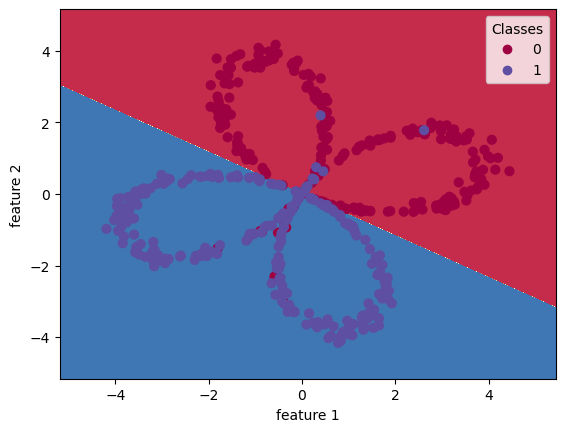

In [17]:
## custom z
# h.plot_decision_boundary(w.detach().numpy(), b.detach().numpy(), X.numpy(), Y.numpy())
## linear layer
# h.plot_decision_boundary(z_node.weight.detach().T.numpy(), z_node.bias.detach().numpy(), X.numpy(), Y.numpy())
## sequential layer
# h.plot_decision_boundary(forward[0].weight.detach().T.numpy(), forward[0].bias.detach().numpy(), X.numpy(), Y.numpy())
## class z
# h.plot_decision_boundary(z_node.linear.weight.detach().T.numpy(), z_node.linear.bias.detach().numpy(), X.numpy(), Y.numpy())
## class forward
h.plot_decision_boundary(forward_node.linear.weight.detach().T.numpy(), forward_node.linear.bias.detach().numpy(), X.numpy(), Y.numpy())